# Solar Geoengineering Practical --> leading up to group project

This practical will introduce you to the data and plotting routines that you will use in your group project.

# 0. Background on stratospheric aerosol geoengineering

In this practical we will analyze the climate response to stratospheric aerosol geoengineering using results from the Geoengineering Large Ensemble (GLENS) runs. You will need to write about the GLENS experiments in the methods section of your group report. You can find out more about the GLENS runs here: https://journals.ametsoc.org/doi/full/10.1175/BAMS-D-17-0267.1 

There are 2 GLENS experiments:
- **Control** - starts in the year 2010 with GHG emissions following a high-end, rapid-warming scenario
- **Feedback** - starts in the year 2020 with the same GHG scenario as Control but with stratospheric aerosol geoengineering deployed to keep temperatures at 2020 levels, see the paper linked to at the start for more.

We'll be comparing 3 different cases based on those GLENS experiments:
- **baseline**: the climate of today, 2010 - 2029 in the control experiment.
- **global_warming**: the late 21st century in our global warming scenario: 2075 - 2094 in the control experiment. 
- **solar_geo**: the late 21st century in our stratospheric aerosol geoengineering experiment: 2075 - 2094 in the feedback experiment.

You can find a more general overview of stratospheric aerosol geoengineering here: https://onlinelibrary.wiley.com/doi/full/10.1002/wcc.423. This will be useful for the introduction to your report.

You don't need to read these papers to understand this practical though, so let's get started.

## 1. load modules

In [1]:
pip install cf-python

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cf-plot

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import cf
import cfplot as cfp
from netCDF4 import Dataset
from pathlib import Path

In [4]:
from platform import python_version

print(python_version())

3.8.5


# 2. Loading the data

### Now I'll define a function that will combine the steps above to save you time.

With this function you specify the experiment, variable, season and year-range that you want to analyze, and it returns the time-mean over the year-range you specify for that combination. I.e., it follows the processing steps we went through above.

In [5]:
def get_time_mean_data(experiment, variable, season, year_range):
    # INPUTS FOR FUNCTION:
    # experiment = 'control' - for the global warming scenario, or 'feedback' - for the stratospheric aerosol geoengineering experiment.
    # Variable = 'TREFHT', 'TREFHTMX', 'PRECT', 'PRECTMX', or 'P-E'
    # TREFHT = Temperature at the reference height (2m), i.e. air temperature
    # TREFHTMX = The maximum recorded air temperature in a month
    # PRECT = Precipitation rate (rain + snow)
    # PRECTMX = The maximum recorded precipitation rate at the model timestep (30 mins)
    # P-E = Precipitation minus total Evaporation (evaporation, transpiraton and sublimation)
    # season = 'ann', 'djf', 'mam', 'jja', 'son' = annual-mean or season-mean
    # year_range = [start_year, end_year], default is 75 to 94, i.e., a range of 20 years.
    
    if len(year_range) != 2:
        print('year_range must have 2 elements, you inputted:', year_range)
    
    # Select the correct filename format and select the correct indices.
    if experiment == 'control':
        exp_filename = 'control.001.cam.h0.{VAR}.201001-209912.{SEAS}.nc'
        index_range = [year_range[0] - 10, year_range[1] - 10] # starts in year 2010 so -10
    elif experiment == 'feedback':
        exp_filename = 'feedback.001.cam.h0.{VAR}.202001-209912.{SEAS}.nc'
        index_range = [year_range[0] - 20, year_range[1] - 20] # starts in year 2020 so -20
    else:
        print(experiment, 'not recognized. must be either control or feedback')
    
    # Specify filename and location
    data_dir = Path("data/")
    fileloc = data_dir / exp_filename.format(VAR=variable, SEAS=season) # set the correct filename by replacing var and seas with the inputs specified for the function.
    # Open the netcdf file
    netcdf_data = cf.read(fileloc)
    # select the variable data. 
    data = netcdf_data[0] # index 0 is the 3-D variable stored in the file.
    # select the years we want
    data_years = data.subspace[index_range[0]:index_range[1],:,:]
    # take the mean over those years
    data_time_mean = data_years.collapse('mean', axes='T')
    
    # Convert the hydrological variables from from m/s to mm/day 
    if variable == 'PRECT' or variable == 'PRECTMX' or variable == 'P-E':
#         data_time_mean = data_time_mean * 1000. * 60 * 60 * 24
        data_time_mean.units = 'mm/day'
    elif variable == 'TREFHT' or variable == 'TREFHTMX':
        data_time_mean.units = cf.Units('degreesC')
    
    # Output this time-mean result
    return data_time_mean

Now, let's use the function above to produce the same plot as before:

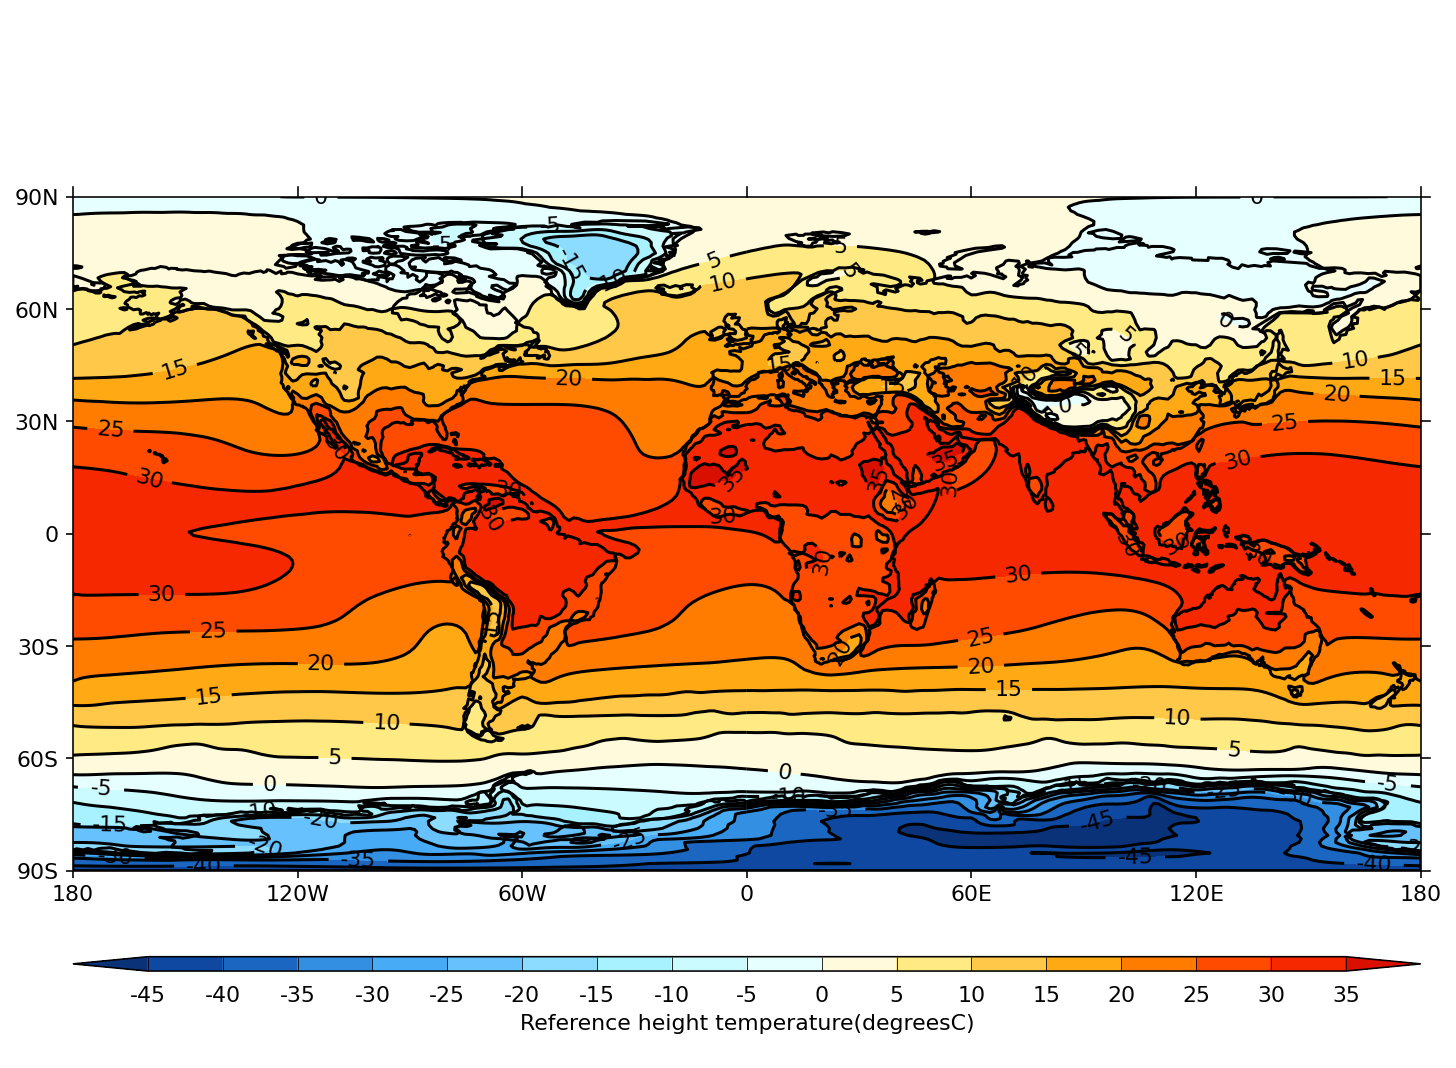

In [7]:
# We define a variable to store the time-mean output and give it a name that makes sense.
global_warming_trefht_ann = get_time_mean_data('control', 'TREFHT', 'ann', [75,94])
# Then we let the plotting routine do its thing.
cfp.con(global_warming_trefht_ann)

### Our plot shows annual-mean ('ann') temperature ('TREFHT') over the years 2075 to 2094 inclusive ([75,94]) for the experiment 'Control'

Great, but knowing what end of century absolute temperatures are in this model doesn't tell us much, let's look at changes in temperature.

# 3. Plotting a change in climate

### TASK 3.1: produce plots to show how the change in temperature over the 21st century under the global warming and solar geoengineering scenarios.

In this practical we'll be comparing 3 different cases:
- **baseline**: the climate of today, 2010 - 2029 in the control experiment
- **global_warming**: the late 21st century in our global warming scenario: 2075 - 2094 in the control experiment. 
- **solar_geo**: the late 21st century in our stratospheric aerosol geoengineering experiment: 2075 - 2094 in the feedback experiment.

First, I'll plot the temperature change between the global warming case and the baseline. Then you will do the same for the temperature change between the solar_geo case and the baseline.

In [0]:
# As before, we define a variable to store the time-mean output and give it a name that makes sense.
global_warming_data = get_time_mean_data('control', 'TREFHT', 'ann', [75,94])
baseline_data = get_time_mean_data('control', 'TREFHT', 'ann', [10,29])
# We can directly plot the anomaly by subtracting one from the other, and asking cfp.con to plot the result.
cfp.con(global_warming_data - baseline_data)

In [0]:
# COPY THE CODE FROM ABOVE AND MODIFY IT SO THAT YOU CAN PLOT THE TEMPERATURE DIFFERENCE BETWEEN THE SOLAR GEO CASE AND THE BASELINE. I RECOMMEND USING THE SAME SHORT-HAND THAT I'VE USED, I.E., solar_geo, SO THAT YOU HAVE CONSISTENT NAMES FOR YOUR VARIABLES.
solar_geo_data = get_time_mean_data('feedback', 'TREFHT', 'ann', [75,94])
baseline_data = get_time_mean_data('control', 'TREFHT', 'ann', [10,29])
cfp.con(solar_geo_data - baseline_data)

### TASK 3.2: produce NICE plots to showing the change in temperature over the 21st century under the global warming and solar geoengineering scenarios.
To compare the temperature changes between these two future cases it is useful to plot them with the same colorbars.

Add lines to plot the solar geo case into the code box below.

In [0]:
# let's set the variable and season to plot. defining a variable means we don't have to repeat ourselves and there's less chance of making mistakes.
var_2_plot = 'TREFHT'
seas_2_plot = 'ann'

# Gather the annual-mean temperature data for the 3 cases
global_warming_data = get_time_mean_data('control', var_2_plot, seas_2_plot, [75,94])
baseline_data = get_time_mean_data('control', var_2_plot, seas_2_plot, [10,29])
# ADD YOUR LINE FOR THE SOLAR GEO CASE HERE
solar_geo_data = get_time_mean_data('feedback', var_2_plot, seas_2_plot, [75,94])
# Now we define the anomaly (difference) between the future and baseline cases.
global_warming_anom = global_warming_data - baseline_data
# ADD YOUR LINE FOR THE SOLAR GEO ANOMALY HERE
solar_geo_anom = solar_geo_data - baseline_data

# Now, we set the contours and colorbar settings.
# cfp.levs() defines the levels for the contourplot, leaving it blank let's the program choose the levels itself. Any values set here will be used in later plots but this can be reset by making a blank call with cfp.levs().
cfp.levs(min=-5,max=15,step=5)
# cfp.cscale() defines the colorscale for the contourplot, leaving it blank let's the program choose the colour scale itself.
cfp.cscale('scale1') # We'll use scale1 which goes from blue through white to red, a good colour scale for temperature change.

# Now we make the contour plots
cfp.con(global_warming_anom)
# ADD YOUR LINE FOR THE SOLAR GEO ANOMALY CONTOUR PLOT HERE
cfp.con(solar_geo_anom)

You should now have 2 ugly-looking plots that don't tell you much. The plots have no titles, the contour levels are too far apart and the colors are off. Let's fix that.
- Copy the code from above into the section below. 
- replace the line: "cfp.con(global_warming_anom)" with "cfp.con(global_warming_anom, title='global warming - baseline Temperature Change (K)')" to add a title to that plot.
- Using the same approach, add a title to the solar geoengineering anom plot
- in the line: cfp.levs(...), Change the values of min, max and step to cover the full range (or near-enough) for both anomalies and have a reasonable step-size. HINT: The earlier plots show the range of values for each anomaly. HINT2: the step-size needs to be small enough that you can see details, but not so small that the labels overrun each other or the plot becomes to busy to read.

For the colors to look right the levels have to be symmetric, e.g. -3 to +3, OR we need to tell the colorscale how to line up with the levels we want to plot. 
- if you have an asymmetric colorscale replace the line "cfp.cscale('scale1')" with "cfp.cscale('scale1', below=X, above=Y)" where X is the number of steps from zero to your minimum + 1 (for the less than extension of the colorscale), and Y is the number of steps from zero to your maximum + 1.

In [0]:
# COPY YOUR CODE FROM ABOVE AND MODIFY IT.
# Example solution

# let's set the variable to plot. defining a variable means we don't have to repeat ourselves and there's less chance of making mistakes.
var_2_plot = 'TREFHT'
seas_2_plot = 'ann'

# Gather the annual-mean temperature data for the 3 cases
global_warming_data = get_time_mean_data('control', var_2_plot, seas_2_plot, [75,94])
baseline_data = get_time_mean_data('control', var_2_plot, seas_2_plot, [10,29])
solar_geo_data = get_time_mean_data('feedback', var_2_plot, seas_2_plot, [75,94])

# Now we define the anomaly (difference) between the future and baseline cases.
global_warming_anom = global_warming_data - baseline_data
solar_geo_anom = solar_geo_data - baseline_data

# Now, we set the contours and colorbar settings.
# cfp.levs() defines the levels for the contourplot, leaving it blank let's the program choose the levels itself. Any values set here will be used in later plots but this can be reset by making a blank call with cfp.levs().
cfp.levs(min=-4,max=12,step=1)
# cfp.cscale() defines the colorscale for the contourplot, leaving it blank let's the program choose the colour scale itself.
cfp.cscale('scale1', below=5, above=13) # We'll use scale1 which goes from blue through white to red, a good colour scale for temperature change.

# Now we plot the contour plots.
cfp.con(global_warming_anom, title='global warming - baseline Temperature Change (K)')
cfp.con(solar_geo_anom, title='solar geoengineering - baseline Temperature Change (K)')

If that worked you should have some publication-quality maps! Exactly the kind of thing you will want for your report...

## TASK 3.3: Write a figure caption for these two plots.

HINT: Check out Figure 6 in the GLENS paper linked to at the top.

HINT2: Don't plagiarize the text, I'll be running your reports through Turnitin.

HINT3: We are only looking at a single ensemble member rather than the entire ensemble.


YOUR FIGURE CAPTION HERE.
Figure 1. Change in temperature over the 21st century under the global warming and solar geoengineering scenarios.
(a)GWR(2075-2094)-BLS(2010-2029)
(b)GEOENGINEERING(2075-2094) - BLS(2010-2029)

## TASK 3.4: Repeat the above for maximum temperature.
Copy the code section from above and edit it to produce plots of the change in maximum annual temperature (TREFHTMX). You'll probably need to change the colourbar range to make it look nice.

In [0]:
# YOUR MAX TEMP MAP PLOT CODE HERE.

# let's set the variable to plot. defining a variable means we don't have to repeat ourselves and there's less chance of making mistakes.
var_2_plot = 'TREFHTMX'
seas_2_plot = 'ann'

# Gather the annual-mean temperature data for the 3 cases
global_warming_data = get_time_mean_data('control', var_2_plot, seas_2_plot, [75,94])
baseline_data = get_time_mean_data('control', var_2_plot, seas_2_plot, [10,29])
solar_geo_data = get_time_mean_data('feedback', var_2_plot, seas_2_plot, [75,94])

# Now we define the anomaly (difference) between the future and baseline cases.
global_warming_anom = global_warming_data - baseline_data
solar_geo_anom = solar_geo_data - baseline_data

# Now, we set the contours and colorbar settings.
# cfp.levs() defines the levels for the contourplot, leaving it blank let's the program choose the levels itself. Any values set here will be used in later plots but this can be reset by making a blank call with cfp.levs().
cfp.levs(min=-23,max=14,step=1)
# cfp.cscale() defines the colorscale for the contourplot, leaving it blank let's the program choose the colour scale itself.
cfp.cscale('scale1', below=24, above=15) # We'll use scale1 which goes from blue through white to red, a good colour scale for temperature change.

# Now we plot the contour plots.
cfp.con(global_warming_anom, title='global warming - baseline Temperature Change (K)')
cfp.con(solar_geo_anom, title='solar geoengineering - baseline Temperature Change (K)')

YOUR MAX TEMP FIGURE CAPTION HERE.
Figure 2. Change in maximum temperature over the 21st century under the global warming and solar geoengineering scenarios.
(a)GWM (2075-2094)- BLS(2010-2029)
(b)GEOENGINEERING(2075-2094) - BLS(2010-2029)

## Section 4: Plotting hydrological change

## TASK 4.1: Picking a good colourscale and colorbar settings for hydrological change.

Red for hot, positive trends and blue for cold, negative trends works great for temperature but positive trends equal more water for hydrological variables so it'll be a bit confusing if hot, red colours = wetter. So, let's pick another colourscale.

- Copy the code section above and this time plot precipitation change, 'PRECT'.
- Change the colourscale to 'BrownBlue12'
- Adjust the levels plotted and / or the number of colours above / below 0 as before to produce a nice-looking plot. HINT: it's OK to not plot the full range of data. 
- Change the title and add a colorbar label by adding: ", colorbar_title='Precipitation Change (mm/day)'" to the cfp.con() call.
- Optionally, you can remove the black lines from the contour plots by adding: ", lines=False" to the end of the calls to cfp.con(). This can be useful if you have well-separated contours in some places but tightly packed lines in others that make it hard to see.

In [0]:
# COPY YOUR CODE FROM ABOVE AND MODIFY IT.
# Example solution

# let's set the variable to plot. defining a variable means we don't have to repeat ourselves and there's less chance of making mistakes.
var_2_plot = 'PRECT'
seas_2_plot = 'ann'

# Gather the annual-mean temperature data for the 3 cases
global_warming_data = get_time_mean_data('control', var_2_plot, seas_2_plot, [75,94])
baseline_data = get_time_mean_data('control', var_2_plot, seas_2_plot, [10,29])
solar_geo_data = get_time_mean_data('feedback', var_2_plot, seas_2_plot, [75,94])

# Now we define the anomaly (difference) between the future and baseline cases.
global_warming_anom = global_warming_data - baseline_data
solar_geo_anom = solar_geo_data - baseline_data

# Now, we set the contours and colorbar settings.
# cfp.levs() defines the levels for the contourplot, leaving it blank let's the program choose the levels itself. Any values set here will be used in later plots but this can be reset by making a blank call with cfp.levs().
cfp.levs(min=-2,max=2,step=0.2)
# cfp.cscale() defines the colorscale for the contourplot, leaving it blank let's the program choose the colour scale itself.
cfp.cscale('BrownBlue12')
# cfp.cscale('scale1', below=5, above=13) # We'll use scale1 which goes from blue through white to red, a good colour scale for temperature change.

# Now we plot the contour plots.
cfp.con(global_warming_anom, title='global warming - Precipitation Change (mm/day)', lines=False, colorbar_title='Precipitation Change (mm/day)')
cfp.con(solar_geo_anom, title='solar geoengineering - Precipitation Change (mm/day)', lines=False, colorbar_title='Precipitation Change (mm/day)')

## TASK 4.2: Plotting percentage change for hydrological variables.

The problem with plotting absolute changes in hydrological variables is that some regions get several mm of rain per day on average whereas others get only mm per year on average.

Below is some code to plot percentage changes, run it. then follow the instructions afterwards to tidy it up.

In [0]:
# let's set the variable to plot. defining a variable means we don't have to repeat ourselves and there's less chance of making mistakes.
var_2_plot = 'PRECT'
seas_2_plot = 'ann'

# Gather the annual-mean temperature data for the 3 cases
global_warming_data = get_time_mean_data('control', var_2_plot, seas_2_plot, [75,94])
baseline_data = get_time_mean_data('control', var_2_plot, seas_2_plot, [10,29])
solar_geo_data = get_time_mean_data('feedback', var_2_plot, seas_2_plot, [75,94])

# Now we define the anomaly (difference) between the future and baseline cases.
global_warming_pc_anom = 100. * (global_warming_data / baseline_data - 1.0)
solar_geo_pc_anom = 100. * (solar_geo_data / baseline_data - 1.0)

# Now, we set the contours and colorbar settings.
# cfp.levs() defines the levels for the contourplot, leaving it blank let's the program choose the levels itself. Any values set here will be used in later plots but this can be reset by making a blank call with cfp.levs().
cfp.levs()
# cfp.cscale() defines the colorscale for the contourplot, leaving it blank let's the program choose the colour scale itself.
cfp.cscale()

# Now we plot the contour plots.
cfp.con(global_warming_pc_anom, title='global warming - Precipitation Change (%)', colorbar_title='Precipitation Change (%)')
cfp.con(solar_geo_pc_anom, title='solar geoengineering - Precipitation Change (%)', colorbar_title='Precipitation Change (%)')

cfp.levs(manual=[0.,0.1, 0.2, 0.5, 1., 2., 4., 8., 16., 32.],extend='max')
cfp.cscale('precip_11lev')
cfp.con(baseline_data, title='Baseline Precipitation (mm/day)', colorbar_title='Precipitation (mm/day)')

We've got 3 plots, 2 % changes and the baseline precipitation, as it's good to have this for reference to help interpret the percentage changes.

There are a couple of problems though. Go back and edit the code above to sort out the colorbars.
- The % change plots are being messed up by an extreme % change in the Sahara. This will be due to some region seeing something like 0.001 mm/day before now seeing 0.01 mm/day. We want to have a scale that suits the full area plotted, so change the range and step size to make a clearer plot.
- The absolute precipitation plot for the baseline has a similar issue, there is some extreme location with >32 mm/day of rain. Again, we want to have a colorbar range suitable for the whole world. Let's be fancy and use a customized logarithmic precipitation scale that will work for deserts and rainforests. replace the cfp.levs() and cfp.cscale() lines with the following:

cfp.levs(manual=[0.,0.1, 0.2, 0.5, 1., 2., 4., 8., 16., 32.], extend='max')

cfp.cscale('precip_11lev')

## Task 4.3: Blockiness.

These contour plots produce smooth contours but the data underneath is blocky. The model used only has a resolution of 1 degree in longitude and latitude, so let's see what the actual data shows.

- copy the code section from above and add the following to each cfp.con() call: ", blockfill=True, lines=False"

In [0]:
# Example solution

# let's set the variable to plot. defining a variable means we don't have to repeat ourselves and there's less chance of making mistakes.
var_2_plot = 'PRECT'
seas_2_plot = 'ann'

# Gather the annual-mean temperature data for the 3 cases
global_warming_data = get_time_mean_data('control', var_2_plot, seas_2_plot, [75,94])
baseline_data = get_time_mean_data('control', var_2_plot, seas_2_plot, [10,29])
solar_geo_data = get_time_mean_data('feedback', var_2_plot, seas_2_plot, [75,94])

# Now we define the anomaly (difference) between the future and baseline cases.
global_warming_pc_anom = 100. * (global_warming_data / baseline_data - 1.0)
solar_geo_pc_anom = 100. * (solar_geo_data / baseline_data - 1.0)

# Now, we set the contours and colorbar settings.
# cfp.levs() defines the levels for the contourplot, leaving it blank let's the program choose the levels itself. Any values set here will be used in later plots but this can be reset by making a blank call with cfp.levs().
cfp.levs()
# cfp.cscale() defines the colorscale for the contourplot, leaving it blank let's the program choose the colour scale itself.
cfp.cscale()

# Now we plot the contour plots.
cfp.con(global_warming_pc_anom, title='global warming - Precipitation Change (%)', colorbar_title='Precipitation Change (%)', blockfill=True, lines=False)
cfp.con(solar_geo_pc_anom, title='solar geoengineering - Precipitation Change (%)', colorbar_title='Precipitation Change (%)', blockfill=True, lines=False)

cfp.levs()
cfp.cscale()
cfp.con(baseline_data, title='Baseline Precipitation (mm/day)', colorbar_title='Precipitation (mm/day)', blockfill=False, lines=False)

This resolution issue isn't a big problem at the global level but it will be once you zoom in to your region so it will be worthwhile using this block_fill option to avoid over-interpreting your data.

## Task 5. Regional plots

Producing regional plots is pretty straight-forward, all you need to do is specify the latitude and longitude in the cfp.mapset function. NOTE like the levels and colourscale functions this is a persistent change that will affect all subsequent plots so if you want to plot somewhere else after, you will have to reset it with an empty call: cfp.mapset().
- Copy your blocky percentage change plot below.
- Add the line: cfp.mapset(lonmin=lon_min, lonmax=lon_max, latmin=lat_min, latmax=lat_max) before the first cfp.con() call.
- Then specify lon_max = XXX, etc. for these 4 variables, replacing the XXX's with appropriate values so that you can plot regional changes around the UK.

In [0]:
# YOUR CODE HERE
# let's set the variable to plot. defining a variable means we don't have to repeat ourselves and there's less chance of making mistakes.
var_2_plot = 'PRECT'
seas_2_plot = 'ann'

# Gather the annual-mean temperature data for the 3 cases
global_warming_data = get_time_mean_data('control', var_2_plot, seas_2_plot, [75,94])
baseline_data = get_time_mean_data('control', var_2_plot, seas_2_plot, [10,29])
solar_geo_data = get_time_mean_data('feedback', var_2_plot, seas_2_plot, [75,94])

# Now we define the anomaly (difference) between the future and baseline cases.
global_warming_pc_anom = 100. * (global_warming_data / baseline_data - 1.0)
solar_geo_pc_anom = 100. * (solar_geo_data / baseline_data - 1.0)

# Now, we set the contours and colorbar settings.
# cfp.levs() defines the levels for the contourplot, leaving it blank let's the program choose the levels itself. Any values set here will be used in later plots but this can be reset by making a blank call with cfp.levs().
cfp.levs()
# cfp.cscale() defines the colorscale for the contourplot, leaving it blank let's the program choose the colour scale itself.
cfp.cscale()
lon_min = -7.2
lon_max = 2.5
lat_min = 50
lat_max = 61
cfp.mapset(lonmin=lon_min, lonmax=lon_max, latmin=lat_min, latmax=lat_max)

# Now we plot the contour plots.
cfp.con(global_warming_pc_anom, title='global warming - Precipitation Change (%)', colorbar_title='Precipitation Change (%)', blockfill=True, lines=False)
cfp.con(solar_geo_pc_anom, title='solar geoengineering - Precipitation Change (%)', colorbar_title='Precipitation Change (%)', blockfill=True, lines=False)

cfp.levs()
cfp.cscale()
cfp.con(baseline_data, title='Baseline Precipitation (mm/day)', colorbar_title='Precipitation (mm/day)', blockfill=True, lines=False)

The colourbars will be a bit off but you get the picture.

## Task 6. Outputting plots as png files.

To save image files you'll need to add a couple of lines telling the program to output the graphics to file:
- Copy any of the code sections above to the section below.
- put the line: cfp.gopen(file='MY_DESCRIPTIVE_FILENAME.png') just before the first cfp calls associated with your map.
- change the filename!
- put the line: cfp.gclose() after the end of the cfp calls associated with your map.
If it works, you won't see the image pop up in the notebook, you'll have to check the folder. It's probably best to comment out these gopen and gclose lines while you're editing the map and only put them in when finished.

In [0]:
# YOUR CODE HERE.
# let's set the variable to plot. defining a variable means we don't have to repeat ourselves and there's less chance of making mistakes.
var_2_plot = 'PRECT'
seas_2_plot = 'ann'

# Gather the annual-mean temperature data for the 3 cases
global_warming_data = get_time_mean_data('control', var_2_plot, seas_2_plot, [75,94])
baseline_data = get_time_mean_data('control', var_2_plot, seas_2_plot, [10,29])
solar_geo_data = get_time_mean_data('feedback', var_2_plot, seas_2_plot, [75,94])

# Now we define the anomaly (difference) between the future and baseline cases.
global_warming_pc_anom = 100. * (global_warming_data / baseline_data - 1.0)
solar_geo_pc_anom = 100. * (solar_geo_data / baseline_data - 1.0)

# Now, we set the contours and colorbar settings.
# cfp.levs() defines the levels for the contourplot, leaving it blank let's the program choose the levels itself. Any values set here will be used in later plots but this can be reset by making a blank call with cfp.levs().

cfp.levs()
# cfp.cscale() defines the colorscale for the contourplot, leaving it blank let's the program choose the colour scale itself.
cfp.cscale()
lon_min = -7.2
lon_max = 2.5
lat_min = 50
lat_max = 61
cfp.mapset(lonmin=lon_min, lonmax=lon_max, latmin=lat_min, latmax=lat_max)

# Now we plot the contour plots.
cfp.gopen(file='PRECT_gw-base_pc.png')
cfp.con(global_warming_pc_anom, title='global warming - Precipitation Change (%)', colorbar_title='Precipitation Change (%)', blockfill=True, lines=False)
cfp.gclose(view=True)

cfp.gopen(file='PRECT_sg-base_pc.png')
cfp.con(solar_geo_pc_anom, title='solar geoengineering - Precipitation Change (%)', colorbar_title='Precipitation Change (%)', blockfill=True, lines=False)
cfp.gclose(view=True)

cfp.levs()
cfp.cscale()
cfp.gopen(file='PRECT_base.png')
cfp.con(baseline_data, title='Baseline Precipitation (mm/day)', colorbar_title='Precipitation (mm/day)', blockfill=True, lines=False)
cfp.gclose(view=True)

## Fantastic, now you have everything you need to produce high-quality map plots for your group project!

If you want to get a bit fancier, you can try some of the following stuff which you could try implementing in your project.

Browse through these as I've put them in no particular order, and some are more involved than others

## Extra 1. Land-area-weighted regional means.

This function is a two-for-one, it subspaces the region of interest and it calculates the land-area weighted mean over the area plotted.

In [0]:
def get_regional_data_and_mean(experiment, variable, season, lon_range, lat_range, year_range):
    # calculates the regional time mean.
    # Same inputs as get_time_mean_data but also you must specify:
    # lat_range = [lat_min, lat_max], e.g, [20, 35]
    # lon_range = [lon_min, lon_max], e.g, [100, 135]
    
    if len(year_range) != 2 or len(lon_range) != 2 or len(lat_range) != 2:
        print('year_range, lon_range, lat_range must have 2 elements, you inputted:', year_range, lon_range, lat_range)
    
    # Select the correct filename format and select the correct indices.
    if experiment == 'control':
        exp_filename = 'control.001.cam.h0.{VAR}.201001-209912.{SEAS}.nc'
        index_range = [year_range[0] - 10, year_range[1] - 10] # starts in year 2010 so -10
    elif experiment == 'feedback':
        exp_filename = 'feedback.001.cam.h0.{VAR}.202001-209912.{SEAS}.nc'
        index_range = [year_range[0] - 20, year_range[1] - 20] # starts in year 2020 so -20
    else:
        print(experiment, 'not recognized. must be either control or feedback')
    
    # Specify filename and location for the data
    data_dir = Path("data/")
    fileloc = data_dir / exp_filename.format(VAR=variable, SEAS=season) # set the correct filename by replacing var and seas with the inputs specified for the function.
    # Open the netcdf file
    netcdf_data = cf.read(fileloc)
    # select the variable data. 
    data = netcdf_data[0] # index 0 is the 3-D variable stored in the file.
    data.cyclic('X') # set longitude to be cyclic
    # select the years we want
    data_years = data.subspace[index_range[0]:index_range[1],:,:]
    # take the mean over those years
    data_time_mean = data_years.collapse('mean', axes='T', squeeze=True)
    # Select only that data in our target area.
    data_time_mean_region = data_time_mean.subspace(X=cf.wi(lon_range[0], lon_range[1]), Y=cf.wi(lat_range[0],lat_range[1]))
    
    # Convert the hydrological variables from from m/s to mm/day 
    if variable == 'PRECT' or variable == 'PRECTMX' or variable == 'P-E':
        data_time_mean_region.units = 'mm/day'
    elif variable == 'TREFHT' or variable == 'TREFHTMX':
        data_time_mean_region.units = cf.Units('degreesC')
    
    # Now, let's load up the weightings.
    # Load up the gridcell weights (fraction of global area)
    area_weight_fileloc = data_dir / 'area_weight.nc' 
    weight_nc_data = cf.read(area_weight_fileloc)
    weight_data = weight_nc_data[0]

    # Load up the gridcell land fraction
    land_frac_fileloc = data_dir / 'land_fraction.nc' 
    land_frac_nc_data = cf.read(land_frac_fileloc)
    land_frac_data = 0.01 * land_frac_nc_data[0] # convert from % to fraction, so that this totals to 1.

    # Take the product of gridcell weight and land fraction
    land_weight_data = weight_data * land_frac_data
    
    # Weight the gridcells in our target area so that they sum to one.
    land_weight_data_space = land_weight_data.subspace(X=cf.wi(lon_range[0], lon_range[1]), Y=cf.wi(lat_range[0],lat_range[1]))
    land_weight_data_space_array = land_weight_data_space.array / np.sum(land_weight_data_space.array)
    
    # take the mean over those years
    data_land_weighted = land_weight_data_space_array * data_time_mean_region.array
    data_time_mean_region_mean = np.sum(data_land_weighted)
    
    # Output this time-mean result
    return data_time_mean_region, data_time_mean_region_mean, land_weight_data_space

Below is an example using this new function to create regional plots.
- The regional plot works the same as before but instead of specifying the area in the cfp.con() call, it is specified by the function which gets the data.
- The function outputs 3 things which are stored in: data, mean, weight:
- data: same as earlier function but only over the specified region
- mean: the land-area weighted mean of the data over the specified area
- weight: the weighting applied, i.e., the land area weight (a product of the relative area of gridcells [1x1 degree lon lat is a much smaller area at poles than at equator], and land area fraction of each grid cell)

In [0]:
lon_range = [-15, 10]
lat_range = [45, 65]

data, mean, weight = get_regional_data_and_mean('control', 'TREFHT', 'ann', lon_range, lat_range, [10,29])

baseline_temp_UK = mean # you'll want to create variables to store the mean if you want to calculate the change between two experiments.
print("The baseline temperature over the UK is:", baseline_temp_UK)

cfp.setvars()
cfp.mapset()
cfp.con(data, blockfill=True, lines=False)
cfp.con(weight, blockfill=True, lines=False) # You won't need to include these plots in your report but you can plot it to help you interpret your results for your region, i.e., what parts are actually land in the model.

## Question: what is wrong with claiming the mean temperature printed here is the UK's mean temperature?

## TASK E1. Copy the code from above and modify it so that you get a more accurate value for the UK's average temperature.

In [0]:
# YOUR CODE HERE.
lon_range = [-8, 2.5]
lat_range = [49.3, 61]

data, mean, weight = get_regional_data_and_mean('control', 'TREFHT', 'ann', lon_range, lat_range, [10,29])

baseline_temp_UK = mean # you'll want to create variables to store the mean if you want to calculate the change between two experiments.
print("The baseline temperature over the UK is:", baseline_temp_UK)

cfp.setvars()
cfp.con(data, blockfill=True, lines=False)
cfp.con(weight, blockfill=True, lines=False) # You won't need to include these plots in your report but you can plot it to help you interpret your results for your region, i.e., what parts are actually land in the model.

## Extra 2. Different seasons

Instead of looking at changes in the annual-mean (or maximum) you could see how things are changing in different seasons. This is straightforward; simply change the variable "season" from "ann" to "djf", "mam", "jja" or "son".

You could also look at the seasonality, e.g. taking the difference between jja and djf for each case, or separately assessing changes in summer and winter.

Below is an example showing the fraction of rain that falls in the wet season in india (jja / ann) in the baseline

In [0]:
lon_range = [60, 100]
lat_range = [0, 40]

data_jja, mean_jja, weight = get_regional_data_and_mean('control', 'PRECT', 'jja', lon_range, lat_range, [10,29])
data_ann, mean_ann, weight = get_regional_data_and_mean('control', 'PRECT', 'ann', lon_range, lat_range, [10,29])

baseline_jja_precip_frac_mean = mean_jja / (4.*mean_ann) # we multiply by 4 as there are 12 months in the year vs. 3 in summer.
print("The fraction of rain that falls in the summer is:", baseline_jja_precip_frac_mean)

# Values above 0.25 indicate more rain falls in summer than we'd expect from averaging out over the year.
baseline_jja_precip_frac = data_jja / (4.*data_ann) # we multiply by 4 as there are 12 months in the year vs. 3 in summer.
cfp.con(baseline_jja_precip_frac, blockfill=True, lines=False)

## Task E2. Plot the change in summer rainfall in India between the global warming case and the baseline.

In [0]:
# YOUR CODE HERE.
lon_range = [60, 100]
lat_range = [0, 40]

data_jja, mean_jja, weight = get_regional_data_and_mean('control', 'PRECT', 'jja', lon_range, lat_range, [10,29])
data_jja_global_warming, mean_jja_global_warming, weight = get_regional_data_and_mean('control', 'PRECT', 'jja', lon_range, lat_range, [75,95])
data_ann, mean_ann, weight = get_regional_data_and_mean('control', 'PRECT', 'ann', lon_range, lat_range, [10,29])

change_jja_precip = data_jja_global_warming - data_jja
cfp.con(change_jja_precip, blockfill=True, lines=False)

## Extra 3. Fractional geoengineering

The level of cooling achieved by stratospheric aerosol geoengineering would be a choice, however we've only got results for 1 choice: offsetting all warming from 2020. This The might result in an overshoot in your region for some measures, e.g., precip might increase +5% under global warming and decrease -3% under solar geoengineering. The following functino let's you generate results for a synthetic case where only a fraction of the warming is offset by stratospheric aerosol geoengineering, i.e., we linearly scale between the global warming and the solar geoengineering case.

In [0]:
def frac_geo_regional_data_and_mean(variable, season, lon_range, lat_range, year_range, frac_geo = 0.5):
    """
    This function simply linearly scales the data at each latitude and longitude to be some fraction of the way
    from the value in the RCP8.5 scenario towards the value in the GLENS scenario. 
    If fraction is 0, we return data_RCP8.5, and if the fraction is 1 we return data_GLENS.
    The default is 0.5, i.e., offsetting halve of future warming with solar geoengineering.
    """
    data_global_warming, mean_global_warming, weight = get_regional_data_and_mean('control', variable, season, lon_range, lat_range, year_range)
    data_solar_geo, mean_solar_geo, weight = get_regional_data_and_mean('feedback', variable, season, lon_range, lat_range, year_range)

    # linearly scale the data and means returned by get_regional_data_and_mean
    mean_frac_geo = mean_global_warming + frac_geo * (mean_solar_geo - mean_global_warming)
    # For the full data we need to add an extra step
    data_frac_geo = data_global_warming.copy() # copy format of global warming data
    # Replace data in this copy with the output of this function:
    data_frac_geo[:] = data_global_warming.data.array + frac_geo * (data_solar_geo.data.array - data_global_warming.data.array)
    
    # Returns the same outputs as the get_regional_data_and_mean function but for this synthetic case.
    return data_frac_geo, mean_frac_geo, weight

Here's some example code which plots UK temperatures in this 50% geoengineering case.

In [0]:
#lons and lats for the UK
lon_range = [-15, 10]
lat_range = [45, 65]

# get the data for a case where 50% of future warming is offset by stratospheric aerosol geoengineering. 
data_50, mean_50, weight = frac_geo_regional_data_and_mean('TREFHT', 'ann', lon_range, lat_range, [75,94], frac_geo = 0.5)

print(mean_50)
# Plot this data
cfp.con(data_50, blockfill=True, lines=False)

## Task E3: copy the above code to produce 3 temperature anomaly plots: global warming, solar geo and 50% solar geo all relative to baseline, to confirm that the code has worked as intended.
Hint: Copy your nice temperature plot settings from farther above and integrate those too.

In [0]:
# YOUR CODE HERE.

#lons and lats for the UK
lon_range = [-15, 10]
lat_range = [45, 65]

# get the data for a case from all three cases.
data_50, mean_50, weight = frac_geo_regional_data_and_mean('TREFHT', 'ann', lon_range, lat_range, [75,94], frac_geo = 0.5)
data_solar_geo, mean_solar_geo, weight = get_regional_data_and_mean('feedback','TREFHT', 'ann', lon_range, lat_range, [75,94])
data_global_warming, mean_GW, weight = get_regional_data_and_mean('control', 'TREFHT', 'ann', lon_range, lat_range, [75,94])
data_base, mean_base, weight = get_regional_data_and_mean('control', 'TREFHT', 'ann', lon_range, lat_range, [10,29])

global_warming_anom = data_global_warming - data_base
solar_geo_anom = data_solar_geo - data_base
solar_geo_50_anom = data_50 - data_base

cfp.levs(min=-6,max=6,step=0.5)
cfp.cscale('scale1', below=13, above=13)

# Plot this data
cfp.con(global_warming_anom, blockfill=True, lines=False)
cfp.con(solar_geo_anom, blockfill=True, lines=False)
cfp.con(solar_geo_50_anom, blockfill=True, lines=False)

# Extra 4. Country Borders and higher resolution coastline
Here's how to increase the resolution of your coastline and also how to add country borders.

/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


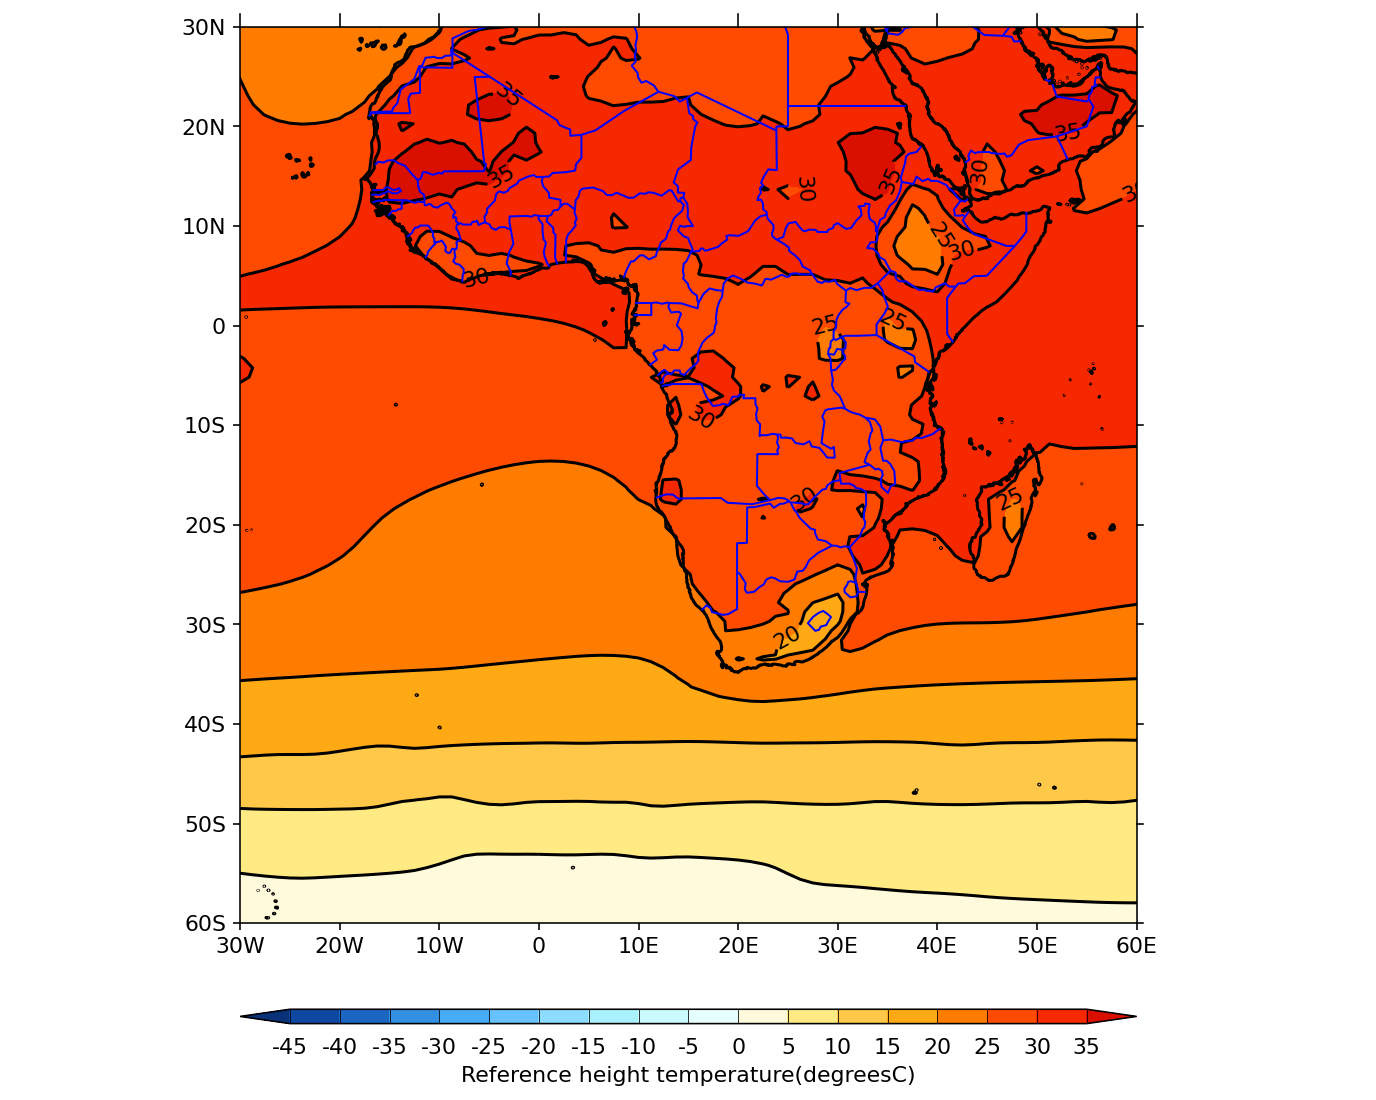

In [12]:
# Import the mapping routine behind CF plot
import cartopy

# We define a variable to store the time-mean output and give it a name that makes sense.
global_warming_trefht_ann = get_time_mean_data('control', 'TREFHT', 'ann', [75,94])

# cfp.gopen() / cfp.gclose() needs to be wrapped around the plotting code if you want to add borders.
cfp.gopen() # replace with line that outputs file, if needed.
cfp.mapset(-30, 60, -60, 30, resolution='10m') # Setting resolution to '10m' gives higher resolution coastlines. Use cfp.mapset(resolution='10m') on its own if using get_regional_data_and_mean to specify region
cfp.con(global_warming_trefht_ann)
cfp.plotvars.mymap.add_feature(cartopy.feature.BORDERS, color='b') # This line adds borders. 'b' for blue, 'k' for black, etc.
cfp.gclose()

# Extra 5. Multiple panels
Here's an example from the cf plot user guide on how to combine multiple panels into one figure

More details on how to fine tune this available on the CF plot user guide https://ajheaps.github.io/cf-plot/user_guide.html search for "multiple plots"

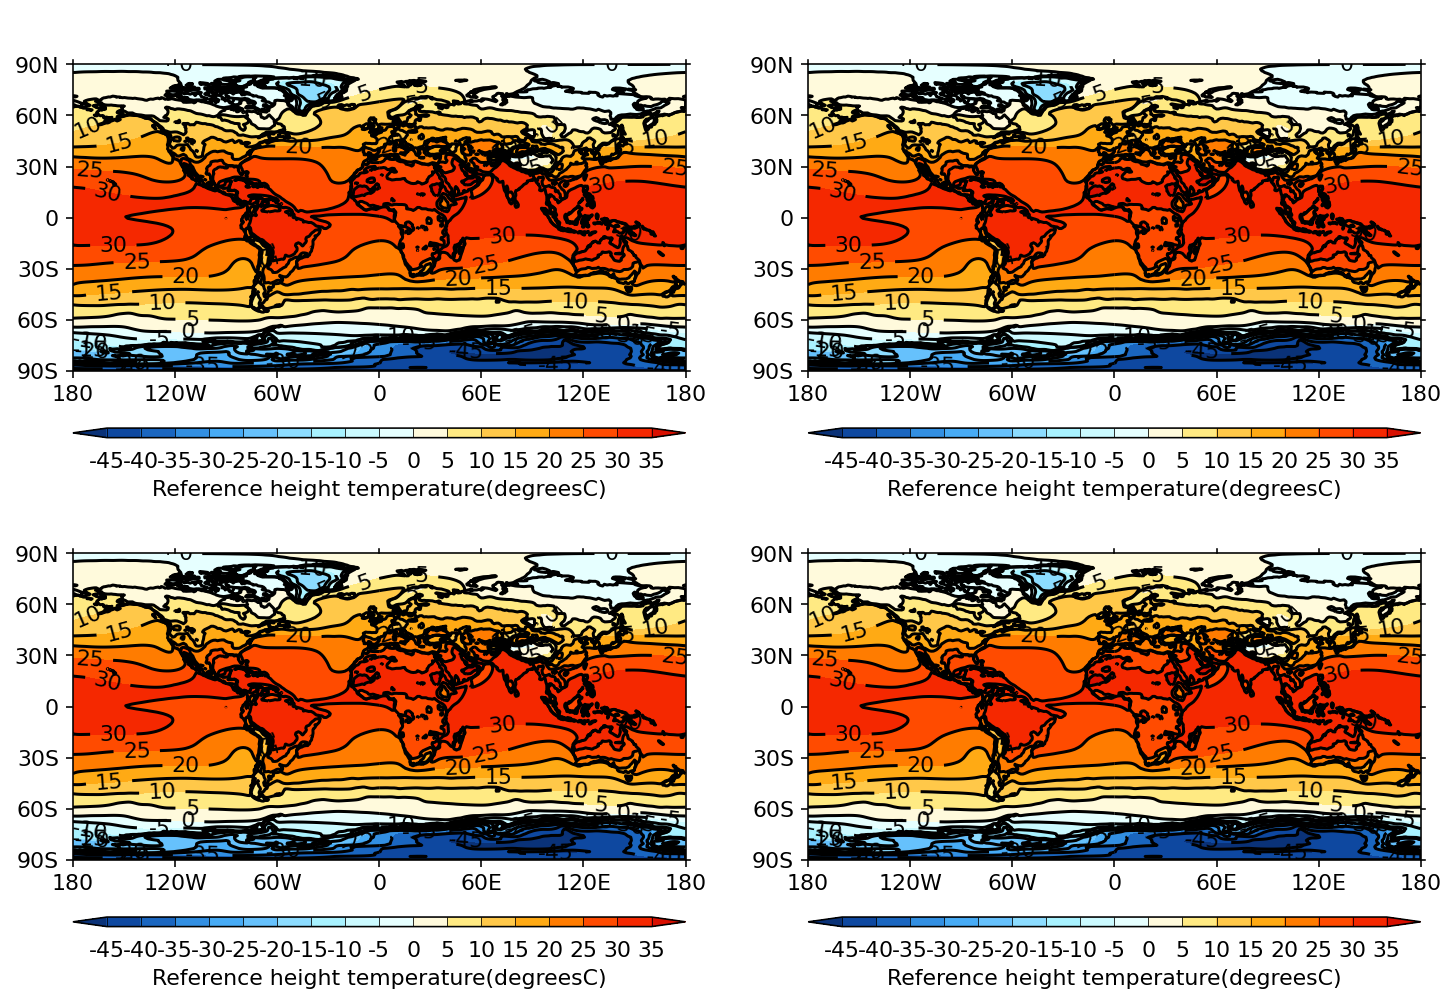

In [16]:
global_warming_trefht_ann = get_time_mean_data('control', 'TREFHT', 'ann', [75,94])

cfp.mapset() # cfp.cscale(), cfp.levs

cfp.gopen(rows=2, columns=2, bottom=0.2)
cfp.gpos(1)
cfp.con(global_warming_trefht_ann)
cfp.gpos(2)
cfp.con(global_warming_trefht_ann)
cfp.gpos(3)
cfp.con(global_warming_trefht_ann)
cfp.gpos(4)
cfp.con(global_warming_trefht_ann)
cfp.gclose()

# FIN.

You are done, great! 




I've copied 

## X. Background on using CF and CF-plot.

This is some background on using the 

In [0]:
"""
There are two experiments, and two files for each variable:
Control - starts in the year 2010 with GHG emissions following a high-end, rapid-warming scenario
Feedback - starts in the year 2020 with the same GHG scenario as Control but with stratospheric aerosol 
geoengineering deployed to keep temperatures at 2020 levels, see the paper linked to at the start for more.
"""
control_filename = 'control.001.cam.h0.{VAR}.201001-209912.{SEAS}.nc' # The {VAR} and {SEAS} parts will be specified later
feedback_filename = 'feedback.001.cam.h0.{VAR}.202001-209912.{SEAS}.nc'

Now let's open a file and see what's in it.

In [0]:
# this specifies the path to the data, using "/" to separate folders, and it should work in both mac and linux.
data_dir = Path("data/")

# Now we're going to open a test netCDF file. netCDF is just a standardized data filetype
control_fileloc = data_dir / control_filename.format(VAR='TREFHT', SEAS='ann') 
# feedback_fileloc = data_dir / feedback_filename.format(VAR='TREFHT', SEAS='ann') 

# Now we will open the netCDF file (.nc)
control_nc = cf.read(control_fileloc)
# feedback_nc = cf.read(feedback_fileloc)

# Let's see what's in it. print statements are a great way to work out what variables are.
print(control_nc)
# print(feedback_nc)

control_nc is a list of the "fields" or variables in the netcdf file. The first "Field" listed is the variable we're interested in, the reference height temperature. This is the 2m air temperature which is the standard way of reporting air temperatures. It has the short-name "TREFHT" so let's check that "field" out. The other fields describe some of the conditions in the climate model, e.g. CO2 concentration, but we can ignore those.

In [0]:
# As this is a list, note the [], and we want the first element we use the index 0. Python starts counting indices from 0.
temp2m = control_nc[0]
print(temp2m)
# temp2m = feedback_nc[0]
# print(temp2m)

Now we can see what this temperature "Field" looks like. It has a data part, a cell method, and dimensions.

In [0]:
# Now let's select the 30 years between 2075 - 2094. there's an issue with the last few years so we won't run up until 2100.
temp2m_20yrs = temp2m.subspace[55:75,:,:] # The experiment starts its index from 2010 [0], hence 65 for 2075.
print(temp2m_20yrs)

Great, we can see that we now have 20 years and it's the years we wanted.

Now let's take the mean of those 20 years.

In [0]:
temp2m_20yrmean = temp2m_20yrs.collapse('mean', axes='T') # Collapse calculates a statistical function (a mean here) on the specified axis (T for time)
print(temp2m_20yrmean)

We now effectively have a 2-D longitude-latitude slice. Let's plot it.

In [0]:
cfp.con(temp2m_20yrmean)

Great, we have a nice-looking map. And, we can see that it's automatically labeled the colorbar.

We've got a plot of the average absolute temperature in the years 2075-2094 in an extreme global warming scenario but this doesn't tell us very much on its own. For example, how much has the temperature changed?